In [ ]:
!pip install seaborn matplotlib scikit-learn xgboost pandas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, ConfusionMatrixDisplay
from scipy import stats

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving whale_disease_dataset.csv to whale_disease_dataset (1).csv


In [ ]:
data = pd.read_csv('whale_disease_dataset.csv')
data.head()

,Mercury (µg/L),Lead (µg/L),Cadmium (µg/L),PCBs (µg/L),PAHs (µg/L),DDT (µg/L),Nitrates (mg/L),Phosphates (mg/L),Affect Whale
0,37.454012,18.513293,2.617057,6.727030,5.719959,1.968178,32.412848,0.193997,Immune System Issues
1,95.071431,54.190095,2.469788,7.966814,8.054323,2.367178,8.619318,0.933863,Neurological Disorders
2,73.199394,87.294584,9.062546,2.504679,7.601609,4.272737,43.619728,4.156229,Neurological Disorders
3,59.865848,73.222489,2.495462,6.248741,1.538999,1.700022,30.655812,3.833842,Neurological Disorders
4,15.601864,80.656115,2.719497,5.717460,1.492495,4.348248,7.860194,1.753213,Kidney Damage


In [ ]:
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 Mercury (µg/L)       0
Lead (µg/L)          0
Cadmium (µg/L)       0
PCBs (µg/L)          0
PAHs (µg/L)          0
DDT (µg/L)           0
Nitrates (mg/L)      0
Phosphates (mg/L)    0
Affect Whale         0
dtype: int64


In [ ]:
z_scores = np.abs(stats.zscore(data.iloc[:, :-1]))
threshold = 3  # Z-score above 3 is considered an outlier
outliers = np.where(z_scores > threshold)
print("Number of outliers detected using Z-score:", len(outliers[0]))

Number of outliers detected using Z-score: 2


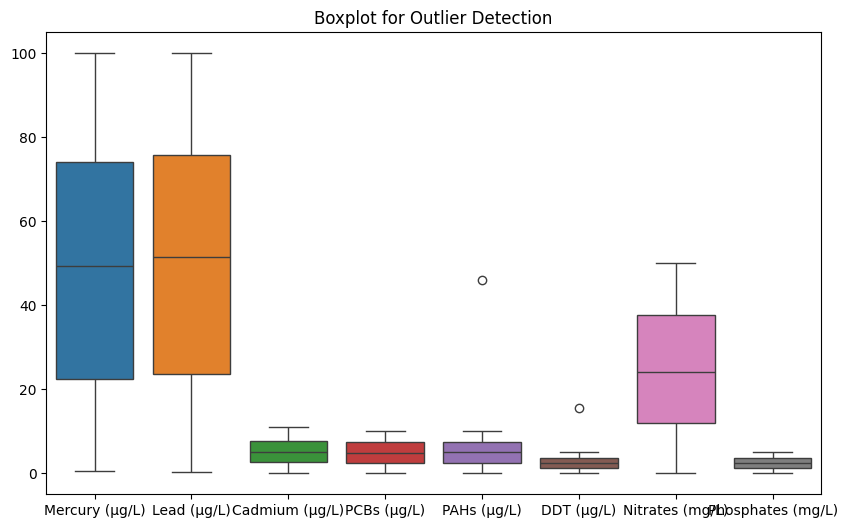

In [ ]:
# Visualization of outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.iloc[:, :-1])
plt.title("Boxplot for Outlier Detection")
plt.show()

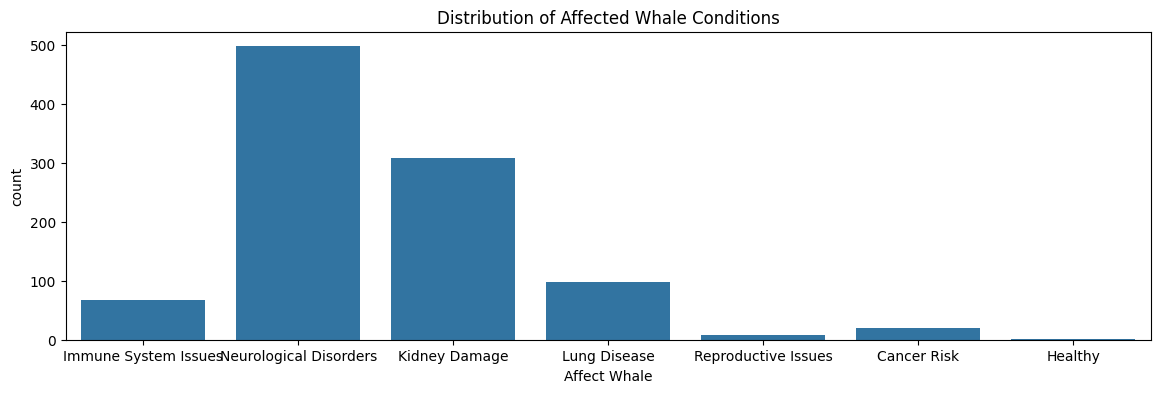

In [ ]:
plt.figure(figsize=(14, 4))
sns.countplot(x='Affect Whale', data=data)
plt.title('Distribution of Affected Whale Conditions')
plt.show()

In [ ]:
X = data[['Mercury (µg/L)', 'Lead (µg/L)', 'Cadmium (µg/L)', 'PCBs (µg/L)',
        'PAHs (µg/L)', 'DDT (µg/L)', 'Nitrates (mg/L)', 'Phosphates (mg/L)']]
y = data['Affect Whale']

In [ ]:
# Convert categorical target ('Affect Whale') into numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [ ]:
print(X_test.shape)

(200, 8)


In [ ]:
# Step 3: Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = svm_model.predict(X_test)


In [ ]:
# Step 5: Evaluate the model
unique_classes = sorted(set(y_test))  # Ensures classes are in order if necessary
target_names = [label_encoder.classes_[i] for i in unique_classes]

# Generate the classification report with matching target names
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, labels=unique_classes, target_names=target_names)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy: 91.00%
Classification Report:
                        precision    recall  f1-score   support

           Cancer Risk       0.40      0.29      0.33         7
  Immune System Issues       0.76      0.94      0.84        17
         Kidney Damage       0.97      0.93      0.95        60
          Lung Disease       0.89      0.81      0.85        21
Neurological Disorders       0.94      0.97      0.95        94
   Reproductive Issues       0.00      0.00      0.00         1

              accuracy                           0.91       200
             macro avg       0.66      0.66      0.65       200
          weighted avg       0.90      0.91      0.91       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


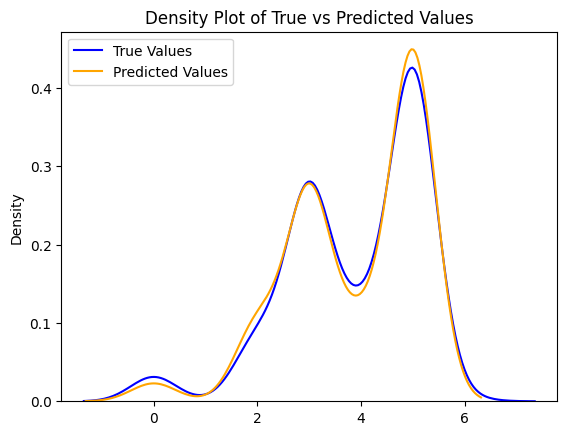

In [ ]:
sns.kdeplot(y_test, label="True Values", color='blue')
sns.kdeplot(y_pred, label="Predicted Values", color='orange')
plt.title("Density Plot of True vs Predicted Values")
plt.legend()
plt.show()